# Project: Investigate a Dataset - No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The columns in the dataset are shown below:

<ul>
<li>PatientId - Identification of a patient</li>
<li>AppointmentID - Identification of each appointment</li>
<li>Gender - Male or Female</li>
<li>ScheduledDay - The day the patient set up their appointment.</li>
<li>AppointmentDay - The day of the actual appointment, when they have to visit the doctor</li>
<li>Age - How old is the patient.</li>
<li>Neighbourhood - The location of the hospital.</li>
<li>Scholarship -  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Hipertension - True or False</li>
<li>Diabetes - True or False</li>
<li>Alcoholism - addiction to the consumption of alcoholic. True or False</li>
<li>Handcap - True or False</li>
<li>SMS_received - 1 or more messages sent to the patient.</li>
<li>No-show - ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

### Question(s) for Analysis
I will be addressing these questions in my analysis
<ul>
<li>What features will help me predict if a patient will show up for their scheduled appointment?</li>
<li>Does the Day of week of appointment determine if the patient will show up for their scheduled appointment?</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# loading and viewing the dataset
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### General Properties
<li>There are no missing values in the dataset</li>
<li>There are no duplicated rows in the dataset</li>

In [4]:
# printing the number of rows and columns of the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns")

There are 110527 rows and 14 columns


In [5]:
# Checking number of unique values in each column
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

><li>It appears some patients made more than one appointment seeing that the number of AppointmentID is greater than that of PatientID</li>
><li>Incorrect Values in handcap since its just True or False (1 or 0)</li>

In [6]:
sum(data.duplicated())

0

> There are no duplicated rows in the dataset

In [7]:
# checking the statistial summary of the data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='summary'></a>
**From the statistical Summary:**
<li>Average age of the patients is 37</li>
<li>About 9.8% of the patients are enrolled in Brasilian welfare program</li>
<li>About 3% are addicted to alcohol</li>
<li>About 2% are handicapped</li>
<li>About 19.7% are hypertensive</li>
<li>About 32% received sms</li>
<li>About 7% are diabetic</li>


### Data Cleaning

In [8]:
data['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

>There is an age value of -1 which occurs only once in the dataset. It makes sense to drop this row

In [9]:
neg_age = data[data['Age'] == -1].index
data.drop(neg_age, inplace=True)

In [10]:
data.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [11]:
# Chcking values of Handcap
data['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>I will be replacing "2", "3", and "4" with "1" since this column represents if a patient is handicapped or not. Its safe to assume thta 2, 3, 4 represents handicapped

In [12]:
values = {2:1, 3:1, 4:1}
data['Handcap'] = data['Handcap'].replace(values)

>I'm renaming some columns for easier convention and relatability

In [13]:
# renaming the No-show column
columns = {'No-show': 'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}
data.rename(columns=columns, inplace=True)
data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
data['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [15]:
val = {'No':0, 'Yes':1}
data['No_show'] = data['No_show'].replace(val)

In [16]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show             int64
dtype: object

> **The ScheduledDay and AppointmentDay are of 'object' data type rather than 'datetime' objects. I will be changing them to their appropriate data types.**
<p>
<li>I'd like to know if the day of the week or the hour of the AppointmentDay has any impact on the No_show in my analysis, hence I will be creating a new column from the Appointment day to get the day of the week.
<li>I'd also like to know if the waiting time between the appointed and scheduled day has any impact on the No_show</li>
</p>

In [17]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No_show       

In [19]:
# creating a new column showing the day of the week
data['AppointmentDayOfWeek'] = data['AppointmentDay'].apply(lambda x: x.strftime('%A'))

In [20]:
# creating a new column showing the hour of the day
data['AppointmentHourOfDay'] = data['AppointmentDay'].apply(lambda x: x.strftime('%H')).astype('int')

In [21]:
#creating a new column showing the waiting days
data['wait_day'] = (data['AppointmentDay'].dt.date - data['ScheduledDay'].dt.date).dt.days
data['wait_day'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
125        1
132        1
126        1
139        1
127        1
Name: wait_day, Length: 131, dtype: int64

In [22]:
data.dtypes

PatientId                           float64
AppointmentID                         int64
Gender                               object
ScheduledDay            datetime64[ns, UTC]
AppointmentDay          datetime64[ns, UTC]
Age                                   int64
Neighbourhood                        object
Scholarship                           int64
Hypertension                          int64
Diabetes                              int64
Alcoholism                            int64
Handicap                              int64
SMS_received                          int64
No_show                               int64
AppointmentDayOfWeek                 object
AppointmentHourOfDay                  int32
wait_day                              int64
dtype: object

In [23]:
data['AppointmentDayOfWeek'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: AppointmentDayOfWeek, dtype: int64

In [24]:
data['AppointmentHourOfDay'].value_counts()

0    110526
Name: AppointmentHourOfDay, dtype: int64

>There is no data in the hour of appointment making it not useful. The column will be dropped

In [25]:
data.drop('AppointmentHourOfDay', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In [26]:
data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDayOfWeek,wait_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0


### Research Question 1 (What Feature will help check which patient will show up for their appointment?)

In [27]:
# Checking the No_show column
show_percent = data['No_show'].value_counts()

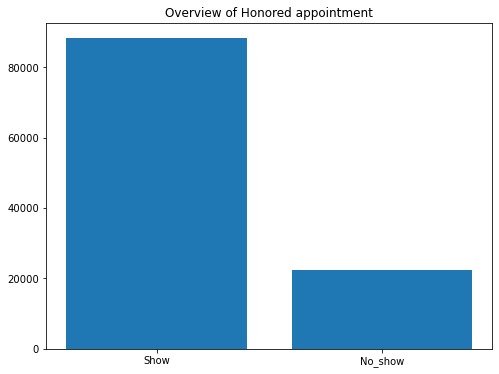

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(show_percent.index, show_percent.values, tick_label=['Show', 'No_show']);
plt.title('Overview of Honored appointment');

>About 80% of the appointments were honoured while 20% was not honoured

In [29]:
#Creating a data frame of those who showed and who didn't show
df_show = data.query('No_show == 0')
df_show.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDayOfWeek,wait_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0


In [30]:
df_noshow = data.query('No_show == 1')
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentDayOfWeek,wait_day
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,Friday,2


### Analyzing Age Feature

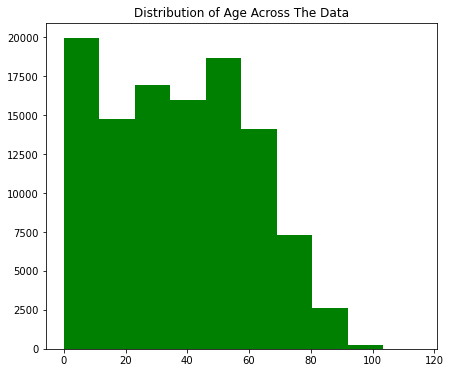

In [31]:
plt.figure(figsize=(7, 6))

# plt.subplot(121)
plt.hist(data['Age'], color='g');
plt.title('Distribution of Age Across The Data');

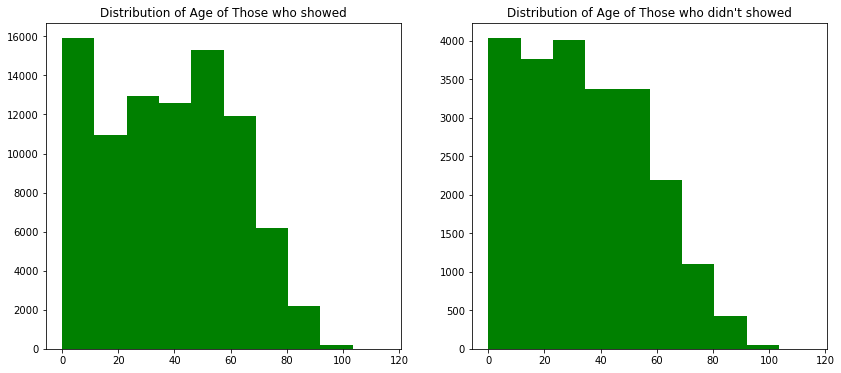

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(df_show['Age'], color='g');
plt.title('Distribution of Age of Those who showed');

plt.subplot(122)
plt.hist(df_noshow['Age'], color='g');
plt.title("Distribution of Age of Those who didn't showed");

>**This is a distribution of the Age accross 2 different dataframes**
><li>The first image shows the distribution in a dataframe of those who showed for the appointment</li>
><li>The second image shows the distribution in a dataframe of those who didn't show for the appointment</li>
><ul>The age is skewed to the right and appears to be a good feature to use to determine if a patient will show or not. </ul>


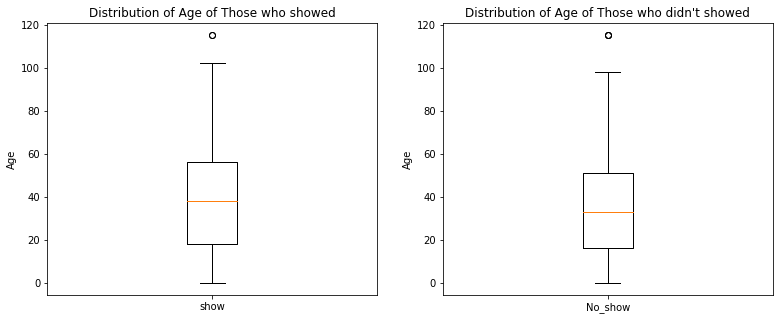

In [33]:
plt.figure(figsize=(13, 5))

plt.subplot(121)
plt.boxplot(df_show['Age'], labels=['show']);
plt.title('Distribution of Age of Those who showed');
plt.ylabel('Age');

plt.subplot(122)
plt.boxplot(df_noshow['Age'], labels=['No_show']);
plt.title("Distribution of Age of Those who didn't showed");
plt.ylabel('Age');

> **There is an outlier in the Age column. The maximum age is 115 and the average around 33**

#### Inspecting the Scholarship Feature

In [34]:
#Function to plot bar chat for feature with two unique values
def plot_bar(col1, col2, tick_label, title):
    plt.figure(figsize=(13, 6))

    plt.subplot(121)
    plt.bar(col1.value_counts().index, 
            col1.value_counts().values,
            tick_label=tick_label,
            color=['indigo', 'teal']);
    plt.title(title[0]);

    plt.subplot(122)
    plt.bar(col2.value_counts().index, 
            col2.value_counts().values,
            tick_label=tick_label,
            color=['indigo', 'teal']);
    plt.title(title[1]);

In [35]:
# Those in the welfare program
scholar_sh = df_show['Scholarship'].value_counts(normalize=True)
scholar_sh

0    0.906096
1    0.093904
Name: Scholarship, dtype: float64

In [36]:
scholar_nosh = df_noshow['Scholarship'].value_counts(normalize=True)
scholar_nosh

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

In [37]:
# Dataframe of those in the welfare program
df_sch = data.query('Scholarship == 1')
df_sch['No_show'].value_counts(normalize=True)

0    0.762637
1    0.237363
Name: No_show, dtype: float64

In [38]:
data['Scholarship'].count()

110526

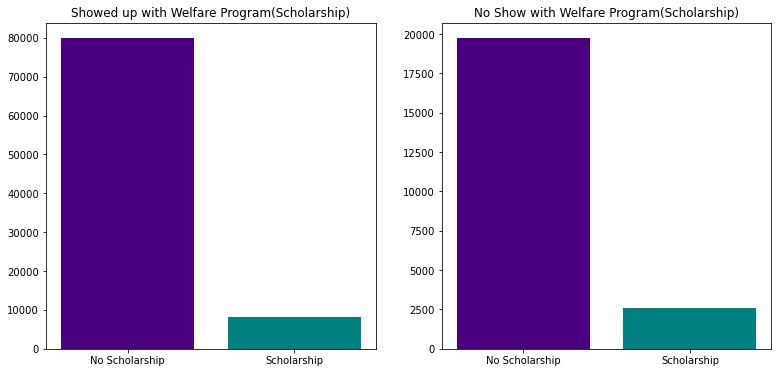

In [39]:
sch_label = ['No Scholarship', 'Scholarship']
sch_title = ['Showed up with Welfare Program(Scholarship)', 'No Show with Welfare Program(Scholarship)']

plot_bar(col1=df_show['Scholarship'],
         col2=df_noshow['Scholarship'],
        tick_label=sch_label,
        title=sch_title)

>The chart above shows a plot of Scholarship in two different dataframes.
><li>The first image being scholarship in a dataframe of only patients who showed for the appointment, i.e. comparing Scholarship with Patients who showed.</li>
><li>The second being scholarship in a dataframe of those who didn't show, i.e. comparing Scholarship with Patients who didn't show</li>

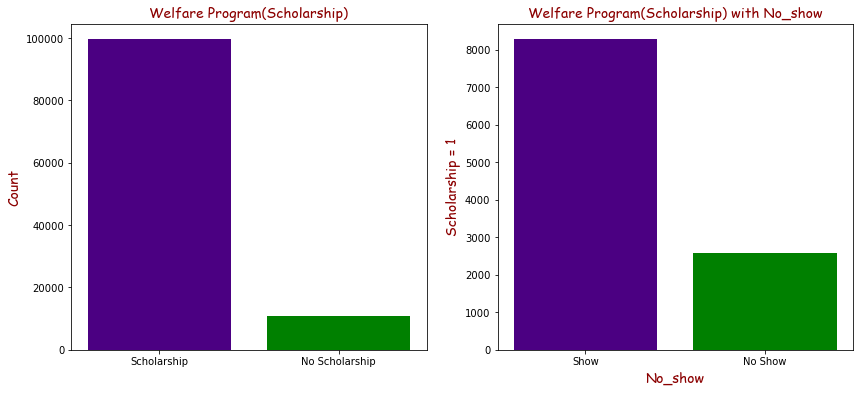

In [40]:
font = {'family': 'fantasy',
        'color':  'darkred',
        'size': 14,
        }

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.bar(data['Scholarship'].value_counts().index, data['Scholarship'].value_counts().values, tick_label=['Scholarship', 'No Scholarship'], color=['indigo', 'green']);
plt.title('Welfare Program(Scholarship)', fontdict=font);
plt.ylabel('Count', fontdict=font)

plt.subplot(122)
plt.bar(df_sch['No_show'].value_counts().index, df_sch['No_show'].value_counts().values, tick_label=['Show', 'No Show'], color=['indigo', 'green']);
plt.title('Welfare Program(Scholarship) with No_show', fontdict=font);
plt.xlabel("No_show", fontdict=font)
plt.ylabel("Scholarship = 1", fontdict=font);

><li>The first barchart is scholarship count in the entire dataframe.</li>
><li>The second is a barchart of No_show count in a dataframe where scholarship = 1</li>
><ul>76% of those in the welfare program showed up.</ul>
><ul>But we can't conclude using this feature because most of the patients are not in the program, hence we have limited data to make inference from</ul>

### Correlation of DataFrame

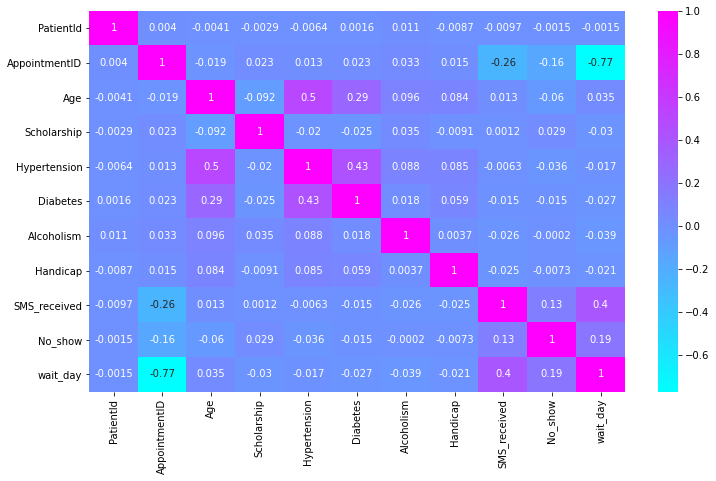

In [41]:
#A heatmap of the correlation of the dataset
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, cmap='cool');

>From the Correlation matrix visualization, Wait_time and SMS_received features have the strongest correlation with the No_show, although, the correlation is very weak

### Analyzing the `wait_day` Feature

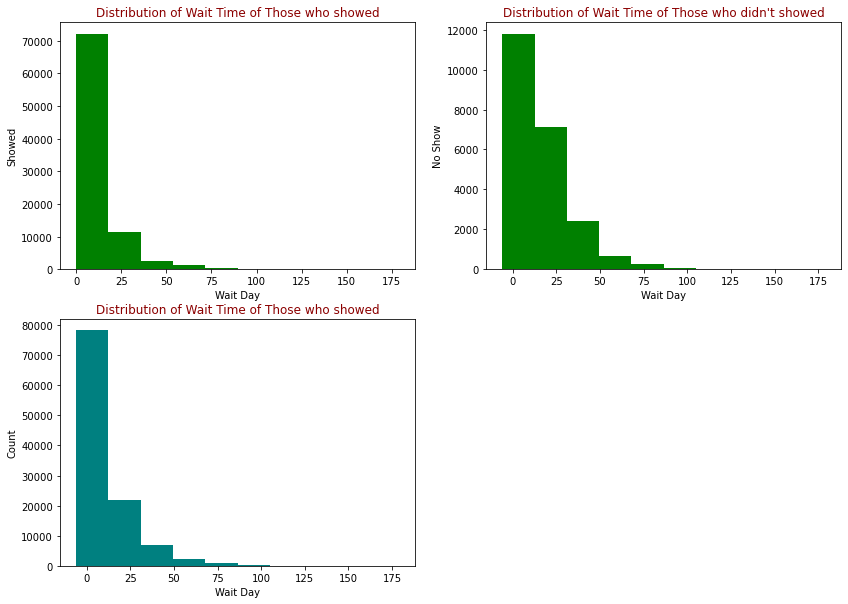

In [42]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.hist(df_show['wait_day'], color='g');
plt.title('Distribution of Wait Time of Those who showed', fontdict={'color':'darkred'})
plt.xlabel('Wait Day')
plt.ylabel('Showed')

plt.subplot(222)
plt.hist(df_noshow['wait_day'], color='g');
plt.title("Distribution of Wait Time of Those who didn't showed", fontdict={'color':'darkred'})
plt.xlabel('Wait Day')
plt.ylabel('No Show')

plt.subplot(223)
plt.hist(data['wait_day'], color='teal')
plt.title('Distribution of Wait Time of Those who showed', fontdict={'color':'darkred'})
plt.xlabel('Wait Day')
plt.ylabel('Count');

>**This is a distribution of the waiting days accross 3 different dataframes**
><li>The first image shows the distribution in a dataframe of those who showed for the appointment</li>
><li>The second image shows the distribution in a dataframe of those who didn't show for the appointment</li>
><li>The third image shows the distribution in the entire dataframe</li>
><ul>Many who had shorter waiting days showed up for the checkup as seen in the first distribution graph while those with longer waiting days didn't show up as seen in the second distribution graph</ul>

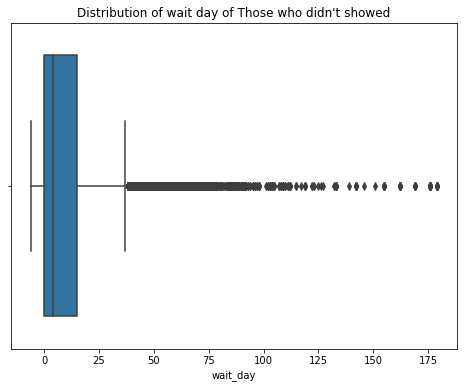

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['wait_day']);
plt.title("Distribution of wait day of Those who didn't showed");

>**There are lots of outliers in the feature that needs to be taken care of**

### Analyzing the SMS_Received Feature

In [44]:
# Checking value_counts of values in SMS_Received
data['SMS_received'].value_counts(normalize=True)

0    0.678971
1    0.321029
Name: SMS_received, dtype: float64

>**32% of the appointment received SMS**

In [45]:
# Value_count of SMS_Received of Show up appointments
df_show['SMS_received'].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [46]:
# Value_count of SMS_Received of No Show appointments
df_noshow['SMS_received'].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

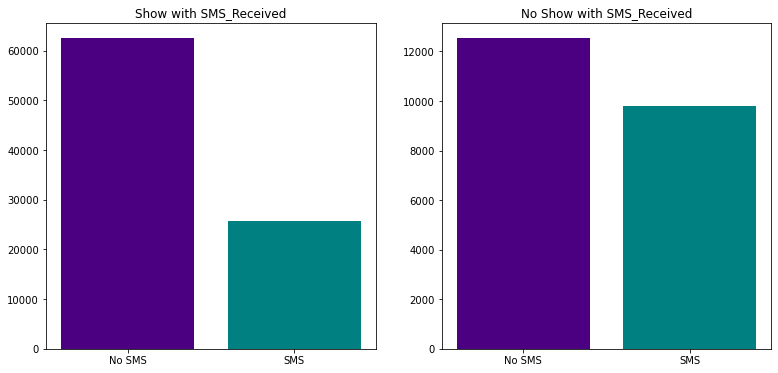

In [47]:
s_label = ['No SMS', 'SMS']
s_title = ['Show with SMS_Received', 'No Show with SMS_Received']

plot_bar(col1=df_show['SMS_received'],
         col2=df_noshow['SMS_received'],
        tick_label=s_label,
        title=s_title)

>The chart above shows a plot of SMS_Received in two different dataframes.
><li>The first image being SMS_Received in a dataframe of only patients who showed for the appointment, i.e. comparing SMS_Received with Patients who showed.</li>
><li>The second being SMS_Received in a dataframe of those who didn't show, i.e. comparing SMS_Received with Patients who didn't show</li>
><ul>We have reasonable data to work with in the SMS_Received Feature. From the graph, we can see that a higher percentage of those who received SMS showed up for the appointment.</ul>
____________________________________________________
>About 25000 who received SMS showed up while about 9000 didn't. That's almost a ratio of 3:1

### Analyzing Hypertension Feature

In [48]:
data['Hypertension'].value_counts(normalize=True)

0    0.802752
1    0.197248
Name: Hypertension, dtype: float64

>20% of them are Hypertensive. Compared to other features analyzed so far, this feature is not strong enough in determining its impact on No_show. Although, we could put it into consideration.

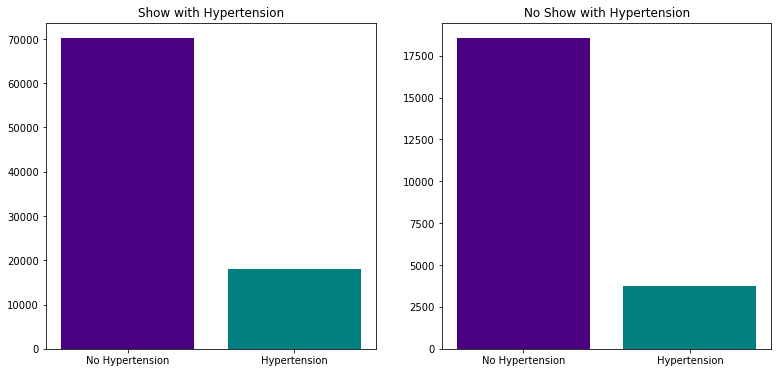

In [49]:
hyper_label = ['No Hypertension', 'Hypertension']
hyper_title = ['Show with Hypertension', 'No Show with Hypertension']
plot_bar(col1=df_show['Hypertension'],
         col2=df_noshow['Hypertension'],
        tick_label=hyper_label,
        title=hyper_title)

>The chart above shows a plot of Hypertension in two different dataframes.
><li>The first image being Hypertension in a dataframe of only patients who showed for the appointment, i.e. comparing Hypertension with Patients who showed.</li>
><li>The second being Hypertension in a dataframe of those who didn't show, i.e. comparing Hypertension with Patients who didn't show</li>

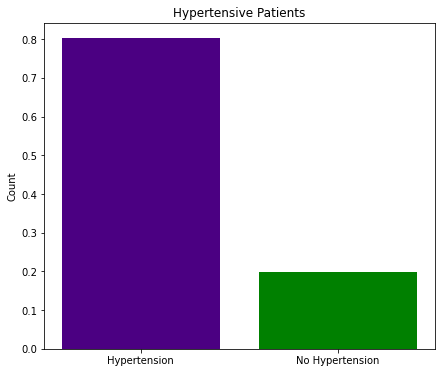

In [50]:
plt.figure(figsize=(7, 6))
plt.bar(data['Hypertension'].value_counts(normalize=True).index,
        data['Hypertension'].value_counts(normalize=True).values,
        tick_label=['Hypertension', 'No Hypertension'],
        color=['indigo', 'green'])
plt.title('Hypertensive Patients')
plt.ylabel('Count');

><ul>We have a little data to work with in the Hypertension Feature. From the graph, we can see that almost 20% of the patients have Hypertension. It is a feature to consider</ul>

### Analyzing Diabetes Features

In [51]:
data['Diabetes'].value_counts(normalize=True)

0    0.928135
1    0.071865
Name: Diabetes, dtype: float64

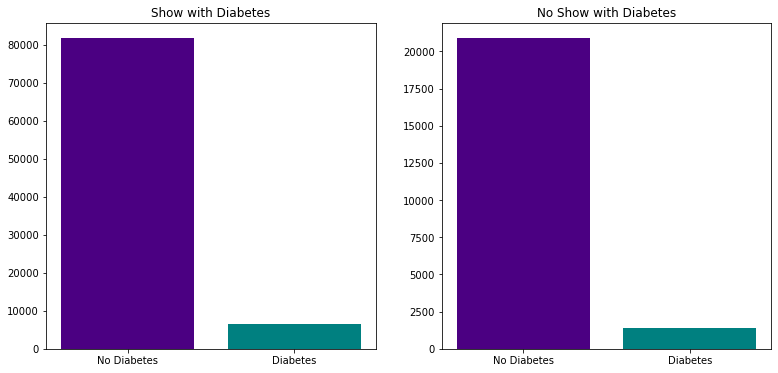

In [52]:
dia_label = ['No Diabetes', 'Diabetes']
dia_title = ['Show with Diabetes', 'No Show with Diabetes']
plot_bar(col1=df_show['Diabetes'],
         col2=df_noshow['Diabetes'],
        tick_label=dia_label,
        title=dia_title)

>The chart above shows a plot of Diabetes in two different dataframes.
><li>The first image being Diabetes in a dataframe of only patients who showed for the appointment, i.e. comparing Diabetes with Patients who showed.</li>
><li>The second being Diabetes in a dataframe of those who didn't show, i.e. comparing Diabetes with Patients who didn't show</li>

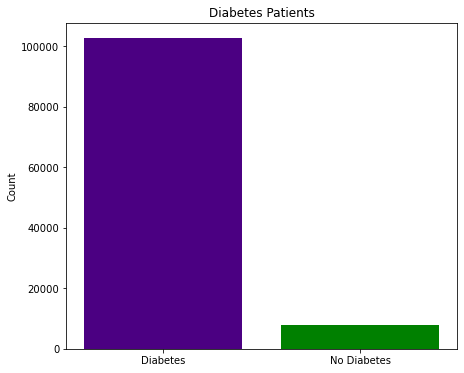

In [53]:
plt.figure(figsize=(7, 6))
plt.bar(data['Diabetes'].value_counts().index, data['Diabetes'].value_counts().values, tick_label=['Diabetes', 'No Diabetes'], color=['indigo', 'green'])
plt.title('Diabetes Patients')
plt.ylabel('Count');

><ul>We don't have enough information to work with in the Diabetes feature. Only 7% were diabetic and this won't tell us enough about its relationship with No_show</ul>
><ul>If we look at the <a href="#summary">Statistical Summary</a></li> again, only two of the features - **(SMS_received & Hypertension)** has fair enough data to give some form information on the relationship we would want to look at</ul>

### Research Question 2  (Does the Day of week of appointment determine if the patient will show up for their scheduled appointment?)

In [54]:
days = data['AppointmentDayOfWeek'].value_counts().iloc[[2, 1, 0, 4, 3, 5]]
days

Monday       22714
Tuesday      25640
Wednesday    25867
Thursday     17247
Friday       19019
Saturday        39
Name: AppointmentDayOfWeek, dtype: int64

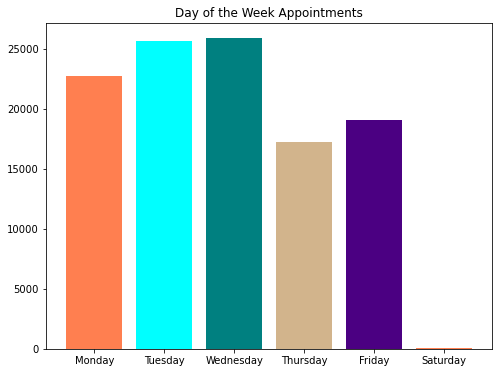

In [55]:
plt.figure(figsize=(8, 6))
plt.bar(days.index, 
        days.values,
        color=['coral', 'aqua', 'teal', 'tan', 'indigo']);
plt.title("Day of the Week Appointments");

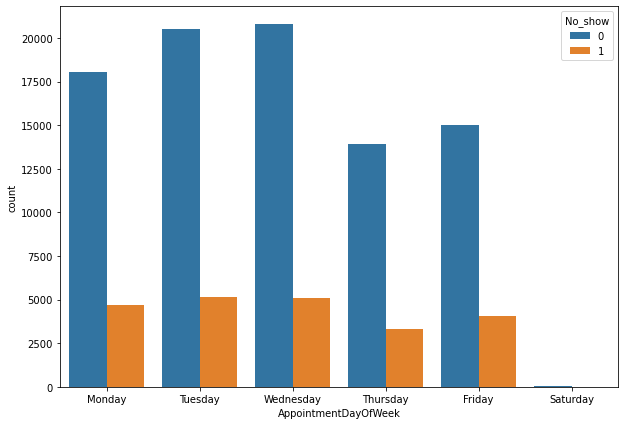

In [56]:
plt.figure(figsize=(10, 7))

sns.countplot(x='AppointmentDayOfWeek', hue='No_show', order=days.index, data=data);

>Generally, appointments were fixed on weekdays with most of them on Tuesday, Wednesday and Monday. It seems patients honour appointments of the first 3 days of the week more

<a id='conclusions'></a>
## Conclusions

Important Features to look at in order of most important are:
<li>Waiting Time - Appointments with longer waiting time had more no_show and those with shorter waiting time showed up</li>
<li>SMS_Received - A lot of appointments with SMS follow up showed up</li>
<li>Hypertension - We could also consider this feature. More of the patients with Hypertension showed up</li>

<ul>Generally, appointments were fixed on weekdays with most of them on Tuesday, Wednesday and Monday. It seems patients honour appointments of the first 3 days of the week more</ul>

<div>_____________________________________________________________________________________________________</div>

**Limitation:**
<ul>This data is biased towards appointments that were honoured. Made it difficult to make proper inference on what features determined if Patients will show or not. More research and more data could be collected on appointments that were not honoured. With a balanced view of the data, more meaningful inference can be made</ul>

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1